---
title: "Assignment 1"
author: "Agustina Albez, Bora Abdik, Liam Hoogstad, Nour El Arrasse and Nurul Putri"
date: "2025-10-06"
format: pdf
---
\newpage
\tableofcontents
\listoffigures
\listoftables
\newpage

# Part 1

## Chipotle Analysis


In [ ]:
# Imports:

#| warning: false
# install.packages(c("dplyr", "ggplot2", "PerformanceAnalytics"))
# install.packages(c("glue"))
# install.packages(c("lubridate"))

library(dplyr)
library(ggplot2)
library(PerformanceAnalytics)
library(lubridate)
library(glue)


In [7]:
# Load data into dataframe
# print("Hey Guys")
all_data <- read.csv("compustat_food_bev.csv")
# print(colnames(all_data)) 
# Filter rows where tic = "CMG"
chipotle_data <- filter(all_data, tic == "CMG")

# Checking for correct sample
#head(chipotle_data)

# Add Prev Day Returns
chipotle_data$prev_close = lag(chipotle_data$prccd)
#head(chipotle_data)

# Remove NA values
#chipotle_data <- na.omit(chipotle_data)
#head(chipotle_data)

chipotle_data$daily_return <- (chipotle_data$prccd - chipotle_data$prev_close) / chipotle_data$prev_close

chipotle_data$volume_change <- chipotle_data$cshtrd - lag(chipotle_data$cshtrd)

chipotle_data$momentum10 <- chipotle_data$prccd - lag(chipotle_data$prccd, n = 10)

chipotle_data$MFV <- ( ((chipotle_data$prccd - chipotle_data$prcld) - (chipotle_data$prchd - chipotle_data$prccd)) / 
    (chipotle_data$prchd - chipotle_data$prcld) ) * chipotle_data$cshtrd

chipotle_data$datadate <- as.Date(chipotle_data$datadate, format = "%d/%m/%Y")

chipotle_data$month <- month(chipotle_data$datadate)
chipotle_data$year <- year(chipotle_data$datadate)

# head(chipotle_data, n = 10)

CMG_Jun_2023_TradeVolume <- chipotle_data %>%
    filter(month == 6, year == 2023) %>%
    pull(cshtrd) %>%
    sum(na.rm = TRUE)

CMG_MeanReturn <- chipotle_data %>%
    pull(daily_return) %>%
    mean(na.rm = TRUE)

highest_prchd <- chipotle_data %>%
  filter(prchd == max(prchd, na.rm = TRUE))

highest_daily_return <- chipotle_data %>%
  filter(daily_return == max(daily_return, na.rm = TRUE))

print(glue("Total trading volume: {CMG_Jun_2023_TradeVolume}"))
print(glue("Mean Daily Return was: {round(CMG_MeanReturn * 100, 2)}%"))
print(glue("The highest positive price was {highest_prchd$prchd} on {highest_prchd$datadate}"))
print(glue("The highest daily return was {round(highest_daily_return$daily_return * 100, 2)}% on {highest_daily_return$datadate}"))

# Data for July 2023:
# head(filter(chipotle_data, month == 7, year == 2023), n = 30)

# Add daily return

Total trading volume: 5392605
Mean Daily Return was: 0.07%
The highest positive price was 2175.01 on 2023-07-19
The highest daily return was 14.7% on 2022-07-27


### Specific Events for Chipotle on July 19th 2023:

On July 18 2023, Chipotle announced franchise expansion into the middle east "to accelerate [their] expansion efforts" (Chipotle Mexican Grill, 2023). The company would initially open restaurants in Dubai and Kuwait, and then open further restaurants if those proved successful(Chipotle Mexican Grill, 2023).


## Wendy

Import libiraries

In [ ]:
library(dplyr)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Import data

In [ ]:
stock <- read.csv('compustat_food_bev.csv')
head(stock)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,186785,1,01/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,813895,4.47,4.540,4.394,4.41,11,5812
2,186785,1,02/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,518021,4.48,4.522,4.400,4.49,11,5812
3,186785,1,03/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,947825,4.44,4.525,4.360,4.48,11,5812
4,186785,1,04/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,534286,4.41,4.490,4.280,4.48,11,5812
5,186785,1,08/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,669380,4.27,4.415,4.260,4.34,11,5812
6,186785,1,09/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,1152416,4.38,4.420,4.270,4.27,11,5812


In [ ]:
wendy = filter(stock, tic=="WEN")
head(wendy)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,3708,3,01/09/2020,WEN,WENDY'S CO,2929911,20.950,21.16,20.7400,20.94,14,5812
2,3708,3,02/09/2020,WEN,WENDY'S CO,3814903,21.970,22.08,21.0100,21.01,14,5812
3,3708,3,03/09/2020,WEN,WENDY'S CO,4280982,21.950,22.48,21.6450,21.95,14,5812
4,3708,3,04/09/2020,WEN,WENDY'S CO,3351921,21.580,22.38,21.4050,22.20,14,5812
5,3708,3,08/09/2020,WEN,WENDY'S CO,3439170,21.850,22.05,21.2300,21.43,14,5812
6,3708,3,09/09/2020,WEN,WENDY'S CO,2847727,22.495,22.61,21.8322,22.00,14,5812


Daily return

In [ ]:
wendy=mutate(wendy, daily_return=(prccd-lag(prccd))/lag(prccd))
head(wendy)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_return
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,3708,3,01/09/2020,WEN,WENDY'S CO,2929911,20.950,21.16,20.7400,20.94,14,5812,NA
2,3708,3,02/09/2020,WEN,WENDY'S CO,3814903,21.970,22.08,21.0100,21.01,14,5812,0.0486873508
3,3708,3,03/09/2020,WEN,WENDY'S CO,4280982,21.950,22.48,21.6450,21.95,14,5812,-0.0009103323
4,3708,3,04/09/2020,WEN,WENDY'S CO,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.0168564920
5,3708,3,08/09/2020,WEN,WENDY'S CO,3439170,21.850,22.05,21.2300,21.43,14,5812,0.0125115848
6,3708,3,09/09/2020,WEN,WENDY'S CO,2847727,22.495,22.61,21.8322,22.00,14,5812,0.0295194508


Overnight return

In [ ]:
wendy=mutate(wendy, overnight_return=(prcod-lag(prccd))/lag(prccd))
head(wendy)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_return,overnight_return
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,3708,3,01/09/2020,WEN,WENDY'S CO,2929911,20.950,21.16,20.7400,20.94,14,5812,NA,NA
2,3708,3,02/09/2020,WEN,WENDY'S CO,3814903,21.970,22.08,21.0100,21.01,14,5812,0.0486873508,0.0028639618
3,3708,3,03/09/2020,WEN,WENDY'S CO,4280982,21.950,22.48,21.6450,21.95,14,5812,-0.0009103323,-0.0009103323
4,3708,3,04/09/2020,WEN,WENDY'S CO,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.0168564920,0.0113895216
5,3708,3,08/09/2020,WEN,WENDY'S CO,3439170,21.850,22.05,21.2300,21.43,14,5812,0.0125115848,-0.0069508804
6,3708,3,09/09/2020,WEN,WENDY'S CO,2847727,22.495,22.61,21.8322,22.00,14,5812,0.0295194508,0.0068649886


Volume change

In [ ]:
wendy=mutate(wendy, volume_change=(cshtrd-lag(cshtrd)))
head(wendy)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_return,overnight_return,volume_change
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1,3708,3,01/09/2020,WEN,WENDY'S CO,2929911,20.950,21.16,20.7400,20.94,14,5812,NA,NA,NA
2,3708,3,02/09/2020,WEN,WENDY'S CO,3814903,21.970,22.08,21.0100,21.01,14,5812,0.0486873508,0.0028639618,884992
3,3708,3,03/09/2020,WEN,WENDY'S CO,4280982,21.950,22.48,21.6450,21.95,14,5812,-0.0009103323,-0.0009103323,466079
4,3708,3,04/09/2020,WEN,WENDY'S CO,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.0168564920,0.0113895216,-929061
5,3708,3,08/09/2020,WEN,WENDY'S CO,3439170,21.850,22.05,21.2300,21.43,14,5812,0.0125115848,-0.0069508804,87249
6,3708,3,09/09/2020,WEN,WENDY'S CO,2847727,22.495,22.61,21.8322,22.00,14,5812,0.0295194508,0.0068649886,-591443


Money flow volume indicator (MFV)

In [ ]:
wendy=mutate(wendy, mvf=(((prccd-prcld)-(prchd-prccd))/(prchd-prcld))*cshtrd)
head(wendy)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_return,overnight_return,volume_change,mvf
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,3708,3,01/09/2020,WEN,WENDY'S CO,2929911,20.950,21.16,20.7400,20.94,14,5812,NA,NA,NA,0
2,3708,3,02/09/2020,WEN,WENDY'S CO,3814903,21.970,22.08,21.0100,21.01,14,5812,0.0486873508,0.0028639618,884992,3030530
3,3708,3,03/09/2020,WEN,WENDY'S CO,4280982,21.950,22.48,21.6450,21.95,14,5812,-0.0009103323,-0.0009103323,466079,-1153558
4,3708,3,04/09/2020,WEN,WENDY'S CO,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.0168564920,0.0113895216,-929061,-2148667
5,3708,3,08/09/2020,WEN,WENDY'S CO,3439170,21.850,22.05,21.2300,21.43,14,5812,0.0125115848,-0.0069508804,87249,1761526
6,3708,3,09/09/2020,WEN,WENDY'S CO,2847727,22.495,22.61,21.8322,22.00,14,5812,0.0295194508,0.0068649886,-591443,2005638


New dataset

In [ ]:
wendy_new=select(wendy, datadate, daily_return, overnight_return, volume_change, mvf)
head(wendy)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_return,overnight_return,volume_change,mvf
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,3708,3,01/09/2020,WEN,WENDY'S CO,2929911,20.950,21.16,20.7400,20.94,14,5812,NA,NA,NA,0
2,3708,3,02/09/2020,WEN,WENDY'S CO,3814903,21.970,22.08,21.0100,21.01,14,5812,0.0486873508,0.0028639618,884992,3030530
3,3708,3,03/09/2020,WEN,WENDY'S CO,4280982,21.950,22.48,21.6450,21.95,14,5812,-0.0009103323,-0.0009103323,466079,-1153558
4,3708,3,04/09/2020,WEN,WENDY'S CO,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.0168564920,0.0113895216,-929061,-2148667
5,3708,3,08/09/2020,WEN,WENDY'S CO,3439170,21.850,22.05,21.2300,21.43,14,5812,0.0125115848,-0.0069508804,87249,1761526
6,3708,3,09/09/2020,WEN,WENDY'S CO,2847727,22.495,22.61,21.8322,22.00,14,5812,0.0295194508,0.0068649886,-591443,2005638


Drop first row because it have nan values

In [ ]:
wendy = wendy[2:nrow(wendy),]
head(wendy)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_return,overnight_return,volume_change,mvf
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
2,3708,3,02/09/2020,WEN,WENDY'S CO,3814903,21.970,22.08,21.0100,21.01,14,5812,0.0486873508,0.0028639618,884992,3030530
3,3708,3,03/09/2020,WEN,WENDY'S CO,4280982,21.950,22.48,21.6450,21.95,14,5812,-0.0009103323,-0.0009103323,466079,-1153558
4,3708,3,04/09/2020,WEN,WENDY'S CO,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.0168564920,0.0113895216,-929061,-2148667
5,3708,3,08/09/2020,WEN,WENDY'S CO,3439170,21.850,22.05,21.2300,21.43,14,5812,0.0125115848,-0.0069508804,87249,1761526
6,3708,3,09/09/2020,WEN,WENDY'S CO,2847727,22.495,22.61,21.8322,22.00,14,5812,0.0295194508,0.0068649886,-591443,2005638
7,3708,3,10/09/2020,WEN,WENDY'S CO,2787857,21.850,23.04,21.8400,22.55,14,5812,-0.0286730385,0.0024449878,-59870,-2741393


Month column

In [ ]:
wendy$datadate = as.Date(wendy$datadate, format="%d/%m/%Y")
wendy = mutate(wendy, month=month(wendy$datadate))
head(wendy)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_return,overnight_return,volume_change,mvf,month
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
2,3708,3,2020-09-02,WEN,WENDY'S CO,3814903,21.970,22.08,21.0100,21.01,14,5812,0.0486873508,0.0028639618,884992,3030530,9
3,3708,3,2020-09-03,WEN,WENDY'S CO,4280982,21.950,22.48,21.6450,21.95,14,5812,-0.0009103323,-0.0009103323,466079,-1153558,9
4,3708,3,2020-09-04,WEN,WENDY'S CO,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.0168564920,0.0113895216,-929061,-2148667,9
5,3708,3,2020-09-08,WEN,WENDY'S CO,3439170,21.850,22.05,21.2300,21.43,14,5812,0.0125115848,-0.0069508804,87249,1761526,9
6,3708,3,2020-09-09,WEN,WENDY'S CO,2847727,22.495,22.61,21.8322,22.00,14,5812,0.0295194508,0.0068649886,-591443,2005638,9
7,3708,3,2020-09-10,WEN,WENDY'S CO,2787857,21.850,23.04,21.8400,22.55,14,5812,-0.0286730385,0.0024449878,-59870,-2741393,9


Year column

In [ ]:
wendy = mutate(wendy, year=year(wendy$datadate))
head(wendy)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_return,overnight_return,volume_change,mvf,month,year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2,3708,3,2020-09-02,WEN,WENDY'S CO,3814903,21.970,22.08,21.0100,21.01,14,5812,0.0486873508,0.0028639618,884992,3030530,9,2020
3,3708,3,2020-09-03,WEN,WENDY'S CO,4280982,21.950,22.48,21.6450,21.95,14,5812,-0.0009103323,-0.0009103323,466079,-1153558,9,2020
4,3708,3,2020-09-04,WEN,WENDY'S CO,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.0168564920,0.0113895216,-929061,-2148667,9,2020
5,3708,3,2020-09-08,WEN,WENDY'S CO,3439170,21.850,22.05,21.2300,21.43,14,5812,0.0125115848,-0.0069508804,87249,1761526,9,2020
6,3708,3,2020-09-09,WEN,WENDY'S CO,2847727,22.495,22.61,21.8322,22.00,14,5812,0.0295194508,0.0068649886,-591443,2005638,9,2020
7,3708,3,2020-09-10,WEN,WENDY'S CO,2787857,21.850,23.04,21.8400,22.55,14,5812,-0.0286730385,0.0024449878,-59870,-2741393,9,2020


Total trading volume in june 2023

In [ ]:
wendy_jun_2023=filter(wendy, month==6 & year==2023)
sum(wendy_jun_2023$cshtrd)
paste0("The total trading volume in june 2023 was ", sum(wendy_jun_2023$cshtrd))

[1] 54557454

[1] "The total trading volume in june 2023 was 54557454"

Mean daily return

In [ ]:
mean(wendy$daily_return)
paste0("The mean daily return, over the entire period was ", mean(wendy$daily_return))

[1] 0.0001164747

[1] "The mean daily return, over the entire period was 0.000116474712706267"

The date that saw the largest positive high price.

In [ ]:
max(wendy$prchd)
filter(wendy, prchd==max(wendy$prchd))
paste0("The date that saw the largest positive high price was ", filter(wendy, daily_return==max(wendy$daily_return))$datadate)

[1] 29.46

GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_return,overnight_return,volume_change,mvf,month,year
<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
3708,3,2021-06-08,WEN,WENDY'S CO,86616410,28.87,29.46,25.39,27.345,14,5812,0.2585004,0.1920227,83374146,61504036,6,2021


[1] "The date that saw the largest positive high price was 2021-06-08"

The date that saw the largest positive daily return.

In [ ]:
max(wendy$daily_return)
filter(wendy, daily_return==max(wendy$daily_return))
print(paste0("The date that saw the largest positive daily return was ", filter(wendy, daily_return==max(wendy$daily_return))$datadate))

[1] 0.2585004

GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_return,overnight_return,volume_change,mvf,month,year
<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
3708,3,2021-06-08,WEN,WENDY'S CO,86616410,28.87,29.46,25.39,27.345,14,5812,0.2585004,0.1920227,83374146,61504036,6,2021


[1] "The date that saw the largest positive daily return was 2021-06-08"


"Shares of The Wendy's Company (NASDAQ: WEN) were rocketing 18% higher today after the WallStreetBets subreddit crowd apparently turned its attention to the fast-food chain and mentioned it as a possible short squeeze candidate" (Duprey, 2021).

Duprey, R. (2021) Wendy's is Suddenly a Meme Stock. Available at: https://www.nasdaq.com/articles/wendys-is-suddenly-a-meme-stock-2021-06-08 (Accessed: 25 September 2025).


## Dominos Pizza

In [ ]:
library(dplyr)
library(ggplot2)
library(PerformanceAnalytics)
library(lubridate)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to

In [ ]:
data = read.csv('compustat_food_bev.csv')


dpz_data = filter(data, tic == "DPZ")

dpz_data$datadate = as.Date(dpz_data$datadate, format = '%d/%m/%Y')
head(dpz_data)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,160211,2,2020-09-01,DPZ,DOMINO'S PIZZA INC,502471,410.15,411.720,405.6500,408.44,11,5812
2,160211,2,2020-09-02,DPZ,DOMINO'S PIZZA INC,585397,403.60,413.180,402.6200,409.86,11,5812
3,160211,2,2020-09-03,DPZ,DOMINO'S PIZZA INC,799206,397.50,403.310,389.6400,403.00,11,5812
4,160211,2,2020-09-04,DPZ,DOMINO'S PIZZA INC,857808,381.81,401.200,376.3301,397.61,11,5812
5,160211,2,2020-09-08,DPZ,DOMINO'S PIZZA INC,682847,376.32,386.645,376.1100,381.57,11,5812
6,160211,2,2020-09-09,DPZ,DOMINO'S PIZZA INC,594344,382.07,387.690,380.4800,382.50,11,5812


In [ ]:
dpz_data$daily_return = (dpz_data$prccd / lag(dpz_data$prccd)) -1 

dpz_data$change_volume = dpz_data$cshtrd - lag(dpz_data$cshtrd)

dpz_data$change_open_close = dpz_data$prccd - dpz_data$prcod

dpz_data$MFV = (((dpz_data$prccd - dpz_data$prcld) - (dpz_data$prchd - dpz_data$prccd)) / (dpz_data$prchd - dpz_data$prcld)) * dpz_data$cshtrd

dpz_data_display = select(dpz_data, datadate, daily_return, change_volume, change_open_close, MFV)

head(dpz_data_display)

,datadate,daily_return,change_volume,change_open_close,MFV
,<date>,<dbl>,<int>,<dbl>,<dbl>
1,2020-09-01,NA,NA,1.71,242543.7
2,2020-09-02,-0.01596977,82926,-6.26,-476743.8
3,2020-09-03,-0.01511397,213809,-5.50,119851.7
4,2020-09-04,-0.03947170,58602,-15.80,-479784.6
5,2020-09-08,-0.01437888,-174961,-5.25,-655623.9
6,2020-09-09,0.01527955,-88503,-0.43,-332206.1


In [ ]:
dpz_data = mutate(dpz_data, month = month(datadate), year  = year(datadate))
head(dpz_data)



,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_return,change_volume,change_open_close,MFV,month,year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,160211,2,2020-09-01,DPZ,DOMINO'S PIZZA INC,502471,410.15,411.720,405.6500,408.44,11,5812,NA,NA,1.71,242543.7,9,2020
2,160211,2,2020-09-02,DPZ,DOMINO'S PIZZA INC,585397,403.60,413.180,402.6200,409.86,11,5812,-0.01596977,82926,-6.26,-476743.8,9,2020
3,160211,2,2020-09-03,DPZ,DOMINO'S PIZZA INC,799206,397.50,403.310,389.6400,403.00,11,5812,-0.01511397,213809,-5.50,119851.7,9,2020
4,160211,2,2020-09-04,DPZ,DOMINO'S PIZZA INC,857808,381.81,401.200,376.3301,397.61,11,5812,-0.03947170,58602,-15.80,-479784.6,9,2020
5,160211,2,2020-09-08,DPZ,DOMINO'S PIZZA INC,682847,376.32,386.645,376.1100,381.57,11,5812,-0.01437888,-174961,-5.25,-655623.9,9,2020
6,160211,2,2020-09-09,DPZ,DOMINO'S PIZZA INC,594344,382.07,387.690,380.4800,382.50,11,5812,0.01527955,-88503,-0.43,-332206.1,9,2020


In [ ]:
dpz_june_2023 = filter(dpz_data, month == 9, year == 2023)
trade_vol = sum(dpz_june_2023$cshtrd, na.rm = TRUE)

print(trade_vol)

print(paste('The total trading value in June 2023 was' , trade_vol ))


[1] 2832257
[1] "The total trading value in June 2023 was 2832257"


In [ ]:

  
mean_daily_return = mean(dpz_data$daily_return, na.rm = TRUE)

print(mean_daily_return)

print(paste("The average daily return of Domino's Pizza was" , mean_daily_return ))


[1] 0.0001312795
[1] "The average daily return of Domino's pizza was 0.00013127951649099"


In [ ]:
max_high = max(dpz_data$prchd, na.rm = TRUE)

print(max_closing)

print(paste("The highest price of Domino's Pizza was" , max_high ))


[1] 567.57
[1] "The highest price of Domino's Pizza was 567.57"


In [ ]:


max_d_return = max(dpz_data$daily_return, na.rm = TRUE)
max_date = dpz_data$datadate[which.max(dpz_data$daily_return)]

print(max_d_return)
print(max_date)

print(paste("The maximum daily return of Domino's Pizza was" , max_d_return, 'on', max_date ))




[1] 0.1455237
[1] "2021-07-22"
[1] "The maximum daily return of Domino's Pizza was 0.145523736632864 on 2021-07-22"


On july 22, 2021, Domino's Pizza released their Q2 2021 earnings where they report revenue and profits more than expectations. Also on the same day they announced a $1 billion share repurchase program. These might be the reason why investors reacted positively which records the highest daily return for the given period. 

## Starbucks

In [1]:
library(dplyr)
library(lubridate)

compustat_food_bev_data <- read.csv("compustat_food_bev.csv")
starbucks_data <- filter(compustat_food_bev_data, tic == "SBUX")
starbucks_data$datadate <- as.Date(starbucks_data$datadate, format = "%d/%m/%Y")

starbucks_data <- starbucks_data[order(starbucks_data$datadate), ]
starbucks_data <- mutate(starbucks_data, daily_return =(prccd-lag(prccd))/lag(prccd))
starbucks_data <- mutate(starbucks_data, momentum_indicator = (prccd-lag(prccd,10)))

starbucks_data <- mutate(starbucks_data, range_daily = (prchd-prcld))
starbucks_data <- mutate(starbucks_data, MFV = (((prccd-prcld)-(prchd-prccd))/range_daily)*cshtrd)
starbucks_data <- mutate(starbucks_data, month = month(datadate))
starbucks_data <- mutate(starbucks_data, year = year(datadate))
head(starbucks_data, 20)

june_2023_data <- filter(starbucks_data, month == 6, year(datadate) == 2023)
sum(june_2023_data$cshtrd)
mean(na.omit(starbucks_data$daily_return))

max_high_price <- starbucks_data %>%
  filter(prchd == max(prchd, na.rm = TRUE)) %>%
  select(datadate, prchd)
print(max_high_price)

max_daily_return <- starbucks_data %>%
  filter(daily_return == max(daily_return, na.rm = TRUE)) %>%
  select(datadate, daily_return)
print(max_daily_return)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_return,momentum_indicator,range_daily,MFV,month,year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25434,1,2020-09-01,SBUX,STARBUCKS CORP,8164620,86.05,86.0900,84.2300,84.700,14,5812,NA,NA,1.8600,7813453.548,9,2020
2,25434,1,2020-09-02,SBUX,STARBUCKS CORP,11315380,88.35,88.7500,86.2900,86.505,14,5812,0.0267286461,NA,2.4600,7635581.626,9,2020
3,25434,1,2020-09-03,SBUX,STARBUCKS CORP,11014390,86.48,88.9800,85.6900,88.602,14,5812,-0.0211658178,NA,3.2900,-5724804.529,9,2020
4,25434,1,2020-09-04,SBUX,STARBUCKS CORP,10291270,86.27,87.7800,85.3100,87.095,14,5812,-0.0024283071,NA,2.4700,-2291578.340,9,2020
5,25434,1,2020-09-08,SBUX,STARBUCKS CORP,11075800,85.41,87.5834,84.7700,85.270,14,5812,-0.0099687029,NA,2.8134,-6036692.870,9,2020
6,25434,1,2020-09-09,SBUX,STARBUCKS CORP,6925503,85.86,86.8270,84.4600,85.934,14,5812,0.0052687039,NA,2.3670,1266895.986,9,2020
7,25434,1,2020-09-10,SBUX,STARBUCKS CORP,7547570,84.88,87.0700,84.5275,85.800,14,5812,-0.0114139297,NA,2.5425,-5454733.481,9,2020
8,25434,1,2020-09-11,SBUX,STARBUCKS CORP,7101233,85.27,85.8500,84.1500,84.950,14,5812,0.0045947220,NA,1.7000,2255685.776,9,2020
9,25434,1,2020-09-14,SBUX,STARBUCKS CORP,5533402,86.63,87.0550,85.6400,85.752,14,5812,0.0159493374,NA,1.4150,2209450.269,9,2020


[1] 151045270

[1] 0.0002910467

    datadate  prchd
1 2021-07-23 126.32
    datadate daily_return
1 2022-05-04   0.09834522


# Part 2

## Part 2.2: Visualise on one line plot the close prices of each ticker, over the period.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


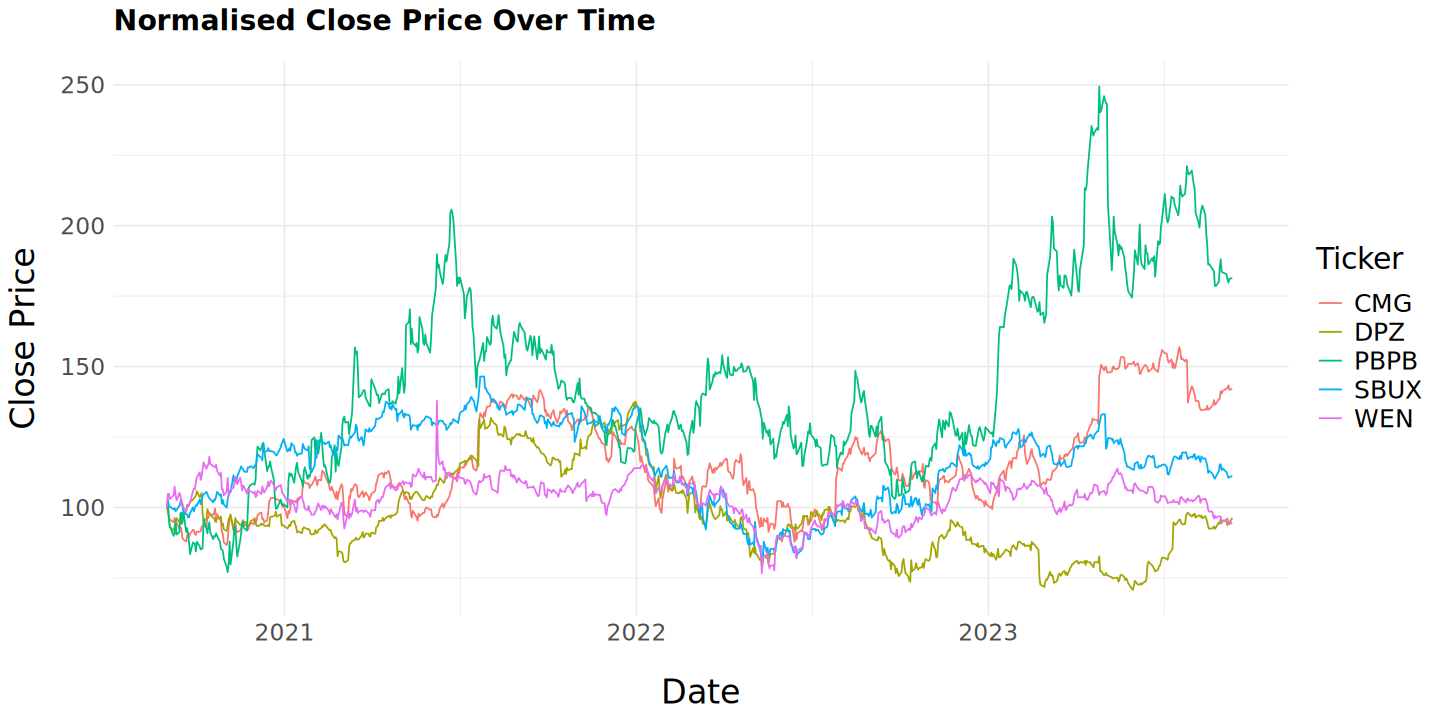

In [8]:
# 

options(repr.plot.width = 12, repr.plot.height = 6)

all_data <- read.csv("compustat_food_bev.csv")

all_data <- all_data %>%
  mutate(datadate = as.Date(datadate, format = "%d/%m/%Y"))

# team12Tickers <- c("CMG", "SBUX", "WEN", "PBPB", "DPZ")

team12Data <- all_data %>%
    filter(tic == "CMG" | tic == "SBUX" | tic == "WEN" | tic == "PBPB" | tic == "DPZ")

team12Normalised <- team12Data %>%
  group_by(tic) %>%
  mutate(relativePrice = prccd / first(prccd) * 100)

ggplot(team12Normalised, aes(x = datadate, y = relativePrice, colour = tic)) +
  geom_line() +
  labs(
    title = "Normalised Close Price Over Time",
    x = "Date",
    y = "Close Price",
    color = "Ticker"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 17, face = "bold", margin = margin(b = 15)),
    axis.title.y = element_text(size = 20, margin = margin(r = 15)),
    axis.title.x = element_text(size = 20, margin = margin(t = 20)),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 18, margin = margin(b = 10)),
    legend.text = element_text(size = 15)
  )




# References

Chipotle Mexican Grill (2023), CHIPOTLE ACCELERATES INTERNATIONAL EXPANSION THROUGH FIRST-EVER DEVELOPMENT AGREEMENT WITH ALSHAYA GROUP IN MIDDLE EAST. Available at: https://newsroom.chipotle.com/2023-07-18-CHIPOTLE-ACCELERATES-INTERNATIONAL-EXPANSION-THROUGH-FIRST-EVER-DEVELOPMENT-AGREEMENT-WITH-ALSHAYA-GROUP-IN-MIDDLE-EAST?utm_source=chatgpt.com (Accessed: 1st October 2025)